In [1]:
import numpy as np
import pandas as pd

In [3]:
mpg_df = pd.read_csv('mpg.csv')
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [5]:
mpg_df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [8]:
mpg_df['category'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: category, dtype: int64

In [9]:
mpg_df['fl'].value_counts()

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

In [7]:
# 1. category는  suv이고, fl은 d인 데이터의 개수는 몇개일까? => 2개이다. 
mpg_df[['category','fl']].value_counts()

category    fl
suv         r     48
pickup      r     30
subcompact  r     29
midsize     r     26
compact     r     25
            p     21
midsize     p     15
minivan     r     10
suv         p      8
2seater     p      5
suv         e      4
pickup      e      3
subcompact  p      3
            d      2
suv         d      2
minivan     e      1
compact     d      1
subcompact  c      1
dtype: int64

In [27]:
#2. hwy변수에서 mean보다 큰 데이터의 개수와, median보다 큰 데이터의 개수는?
hwy_mean = mpg_df['hwy']>mpg_df['hwy'].mean()
print(hwy_mean.value_counts()) # 129개
hwy_median = mpg_df['hwy']>mpg_df['hwy'].median()
print(hwy_median.value_counts()) # 118개

True     129
False    105
Name: hwy, dtype: int64
False    118
True     116
Name: hwy, dtype: int64


In [29]:
#3 가장 많이 존재하는 조합은 몇개의 데이터가 있는가? => 2개
mpg_df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

In [35]:
total_df = mpg_df[['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category']].value_counts()
total_df.sort_values(ascending= False)

manufacturer  model                displ  year  cyl  trans       drv  cty  hwy  fl  category
dodge         ram 1500 pickup 4wd  4.7    2008  8    auto(l5)    4    13   17   r   pickup      2
              caravan 2wd          3.3    2008  6    auto(l4)    f    17   24   r   minivan     2
              dakota pickup 4wd    4.7    2008  8    auto(l5)    4    14   19   r   pickup      2
ford          explorer 4wd         4.0    1999  6    auto(l5)    4    14   17   r   suv         2
dodge         caravan 2wd          3.3    1999  6    auto(l4)    f    16   22   r   minivan     2
                                                                                               ..
volkswagen    passat               1.8    1999  4    manual(m5)  f    21   29   p   midsize     1
                                   2.0    2008  4    auto(s6)    f    19   28   p   midsize     1
                                                     manual(m6)  f    21   29   p   midsize     1
                         

In [49]:
#4. 해당 조합의 데이터가 2개인 조합은 몇개가 있을까? => 9개
sort_total = total_df.sort_values(ascending= False)
sort_total.value_counts()

1    216
2      9
dtype: int64

In [50]:
sort_total.head(10)

manufacturer  model                displ  year  cyl  trans       drv  cty  hwy  fl  category  
dodge         ram 1500 pickup 4wd  4.7    2008  8    auto(l5)    4    13   17   r   pickup        2
              caravan 2wd          3.3    2008  6    auto(l4)    f    17   24   r   minivan       2
              dakota pickup 4wd    4.7    2008  8    auto(l5)    4    14   19   r   pickup        2
ford          explorer 4wd         4.0    1999  6    auto(l5)    4    14   17   r   suv           2
dodge         caravan 2wd          3.3    1999  6    auto(l4)    f    16   22   r   minivan       2
chevrolet     c1500 suburban 2wd   5.3    2008  8    auto(l4)    r    14   20   r   suv           2
honda         civic                1.6    1999  4    auto(l4)    f    24   32   r   subcompact    2
dodge         ram 1500 pickup 4wd  4.7    2008  8    manual(m6)  4    12   16   r   pickup        2
              durango 4wd          4.7    2008  8    auto(l5)    4    13   17   r   suv           2
audi 

<AxesSubplot:>

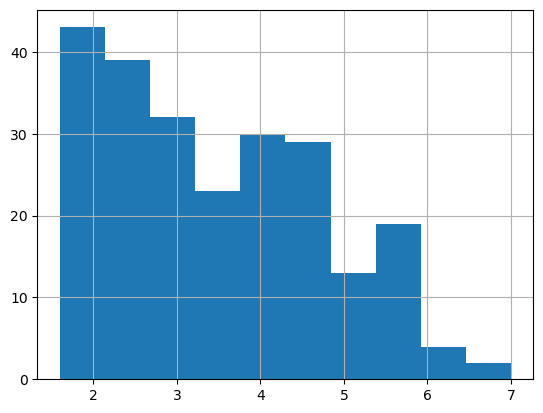

In [36]:
#5. displ의 값이 6보다 큰 데이터의 개수는? => 5개
mpg_df['displ'].hist()

In [43]:
sum(mpg_df['displ']>6)

5

In [48]:
mpg_df[mpg_df['displ']>6].value_counts()

manufacturer  model               displ  year  cyl  trans       drv  cty  hwy  fl  category
chevrolet     corvette            6.2    2008  8    auto(s6)    r    15   25   p   2seater     1
                                                    manual(m6)  r    16   26   p   2seater     1
                                  7.0    2008  8    manual(m6)  r    15   24   p   2seater     1
              k1500 tahoe 4wd     6.5    1999  8    auto(l4)    4    14   17   d   suv         1
jeep          grand cherokee 4wd  6.1    2008  8    auto(l5)    4    11   14   p   suv         1
dtype: int64